## Paper Machine Sheet Break Prediction with CNN model.  Subset where x28 feature is 96.
## Updated with position/velocity, and accelaration Feature Importance.

## This notebook preps the data, loads the model and plots performance charts using the standard Argmax classification

### Reference and Licence

### Dataset: Rare Event Classification in Multivariate Time Series
 ### 2018-10-01  Chitta Ranjan, Markku Mustonen, Kamran Paynabar, Karim Pourak
### https://deeplearn.org/arxiv/48599/dataset:-rare-event-classification-in-multivariate-time-series

### See other workbooks for more details

In [1]:
#Import General Libraries
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np

#import plotly.express as px
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,  classification_report

from random import random

import matplotlib.pyplot as plt

import keras

Using TensorFlow backend.


In [ ]:
from keras import Sequential, regularizers
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import ZeroPadding2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras import optimizers
from keras.callbacks import EarlyStopping
import livelossplot

In [2]:
df=pd.read_csv('processminer-rare-event-mts - data.csv')

Length of df is  6573
Mininmum samples between faults:  3
Number of remaining faults is:  58
remaing shape of df is:  (6521, 26)
Mininmum samples between faults:  7 Maximum samples between faults is:  865
Check, sum of y_true: 58
Build an image array with 6 measurement, velocity, & acceleration time slices on each 12 minute time range image.
image#, first row, last row,         y
   254         254         259        1     
   526         531         536        1     
   539         549         554        1     
   565         580         585        1     
   568         588         593        1     
   592         617         622        1     
   771         801         806        1     
   774         809         814        1     
   815         855         860        1     
   879         924         929        1     
   898         948         953        1     
   981         1036        1041       1     
   1071        1131        1136       1     
   1090        1155        1160 

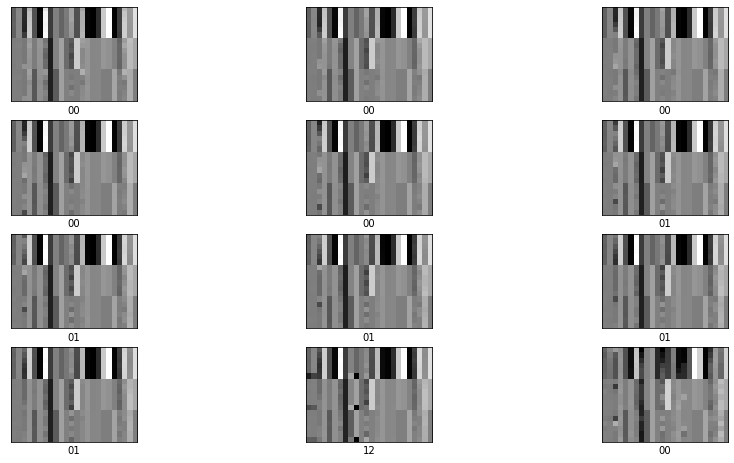

Define Adjusted_Pred
Define Train_Test_Time_Plot


In [3]:
# Run Data Cleaning from PVA Feature Importance Notebook using code in py file, Returns reduced feature and image set 
exec(open('Prep_PVA_Feature_Importance.py').read())

In [4]:
model = keras.models.load_model('PaperMachine_SheetBreak_DVA_model_adamax_x28_96_3Class_Feature_Importance_220718.h5')

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.


### X-Test Performance

In [5]:
y_prob = model.predict_proba(x_test)
a_pred = Adjusted_Pred(y_prob, TH_N)
y_pred = model.predict(x_test).argmax(axis=1)

In [6]:
x_test_cm = confusion_matrix(y_test,a_pred)
print('x_test Confusion Matrix - Adjusted Prediction')
x_test_cm

x_test Confusion Matrix - Adjusted Prediction


array([[1886,  147,    8],
       [   6,   88,    4],
       [   2,   15,    3]], dtype=int64)

In [7]:
CM = confusion_matrix(y_test,y_pred)
print('x_test Confusion Matrix - ArgMax' )
CM

x_test Confusion Matrix - ArgMax


array([[2005,   30,    6],
       [  34,   60,    4],
       [   7,   10,    3]], dtype=int64)

In [11]:
y_prob_train = model.predict_proba(x_train)
a_pred_train = Adjusted_Pred(y_prob_train, TH_N)
y_pred_train = model.predict(x_train).argmax(axis=1)

In [9]:
x_train_cm = confusion_matrix(y_train,a_pred_train)
print('x_train confusion matrix - Adjusted Prediction')
x_train_cm

x_train confusion matrix - Adjusted Prediction


array([[3566,  221,    2],
       [   1,  180,    1],
       [   0,    9,   29]], dtype=int64)

In [13]:
train_CM = confusion_matrix(y_train,y_pred_train)
print('x_train confusion matrix - Argmax')
train_CM

x_train confusion matrix - Argmax


array([[3764,   25,    0],
       [  20,  161,    1],
       [   1,    9,   28]], dtype=int64)

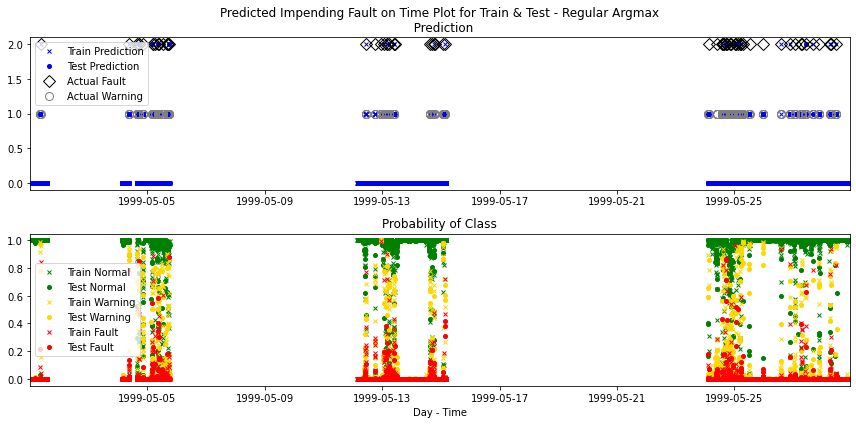

In [14]:
Train_Test_Time_Plot(2, y_train, y_pred_train, y_prob_train, train_indx, y_test, y_pred, y_prob, test_indx, img_index, 4, 0, 6167, 'Time Plot for Train & Test - Regular Argmax', fig_height=6, show_normal=True)

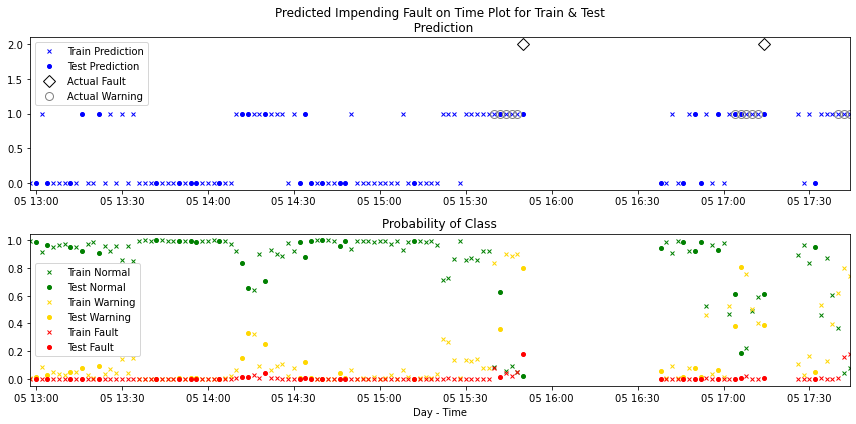

In [15]:
Train_Test_Time_Plot(2, y_train, a_pred_train, y_prob_train, train_indx, y_test, a_pred, y_prob, test_indx, img_index, 4, 985, 1100, 'Time Plot for Train & Test', fig_height=6, show_normal=True)

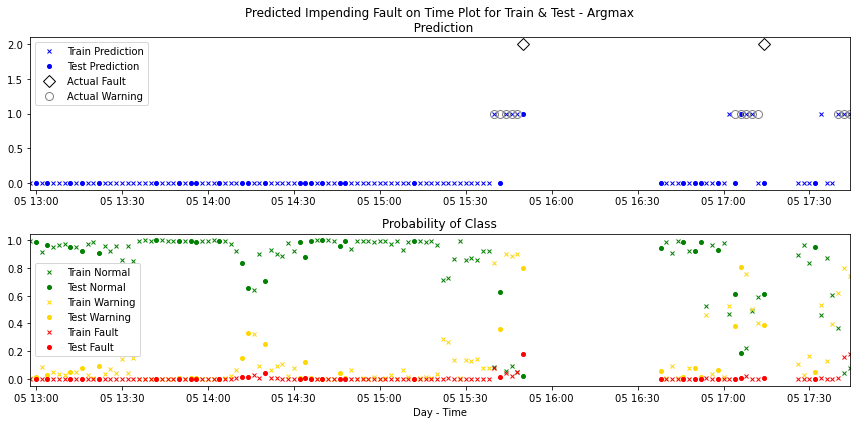

In [16]:
Train_Test_Time_Plot(2, y_train, y_pred_train, y_prob_train, train_indx, y_test, y_pred, y_prob, test_indx, img_index, 4, 985, 1100, 'Time Plot for Train & Test - Argmax', fig_height=6, show_normal=True)

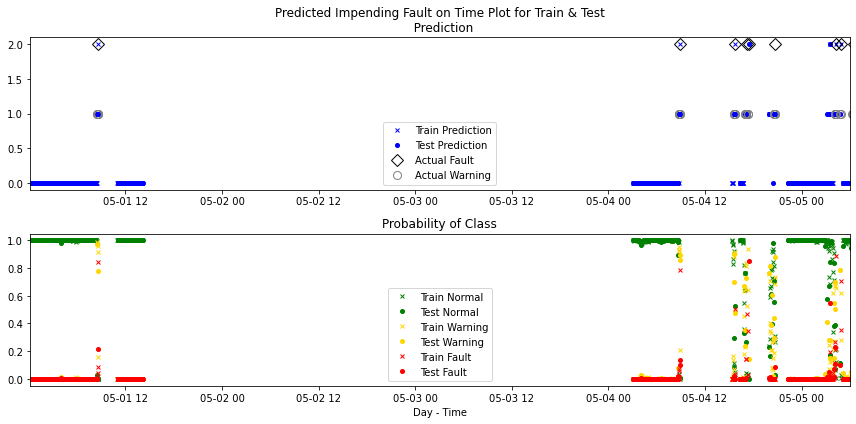

In [17]:
Train_Test_Time_Plot(2, y_train, a_pred_train, y_prob_train, train_indx, y_test, a_pred, y_prob, test_indx, img_index, 4, 0, 800, 'Time Plot for Train & Test', fig_height=6, show_normal=True)

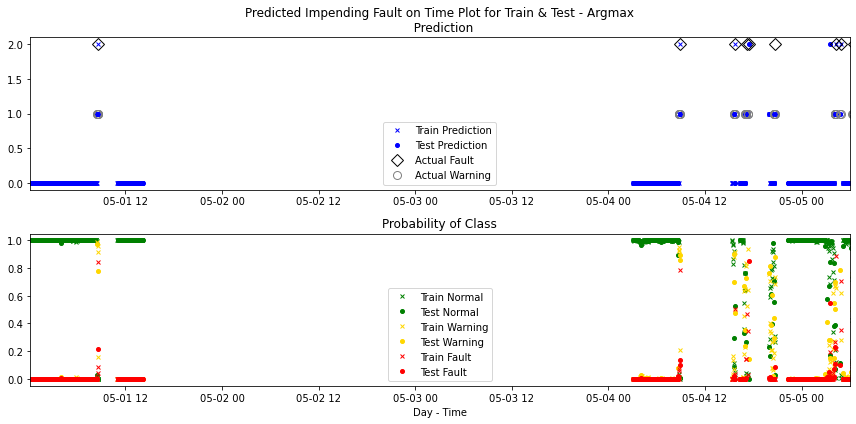

In [18]:
Train_Test_Time_Plot(2, y_train, y_pred_train, y_prob_train, train_indx, y_test, y_pred, y_prob, test_indx, img_index, 4, 0, 800, 'Time Plot for Train & Test - Argmax', fig_height=6, show_normal=True)

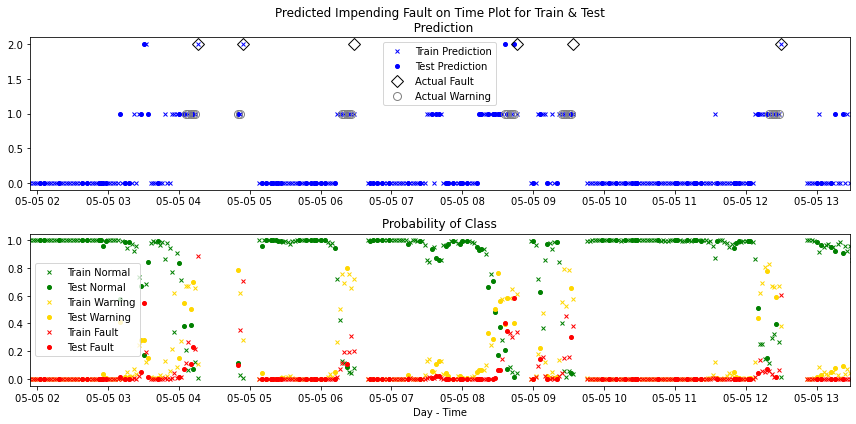

In [20]:
Train_Test_Time_Plot(2, y_train, a_pred_train, y_prob_train, train_indx, y_test, a_pred, y_prob, test_indx, img_index, 4, 700, 1000, 'Time Plot for Train & Test', fig_height=6, show_normal=True)

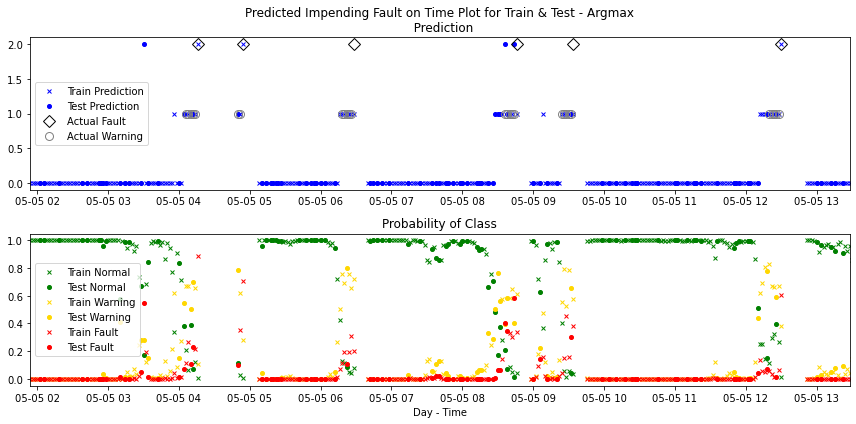

In [19]:
Train_Test_Time_Plot(2, y_train, y_pred_train, y_prob_train, train_indx, y_test, y_pred, y_prob, test_indx, img_index, 4, 700, 1000, 'Time Plot for Train & Test - Argmax', fig_height=6, show_normal=True)

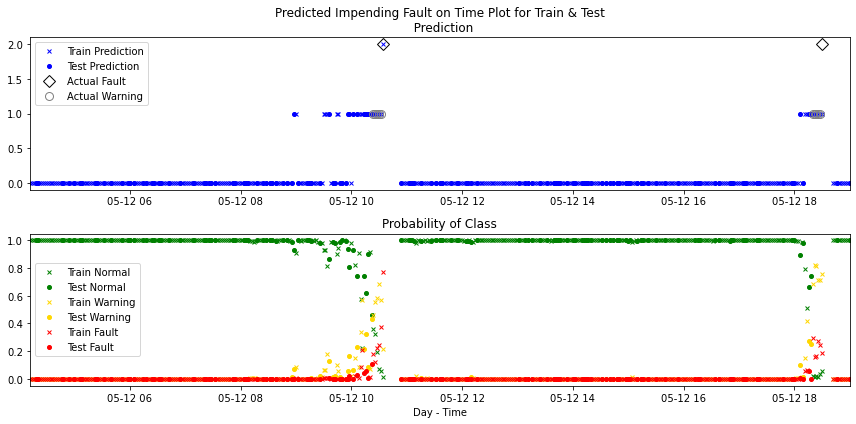

In [21]:
Train_Test_Time_Plot(2, y_train, a_pred_train, y_prob_train, train_indx, y_test, a_pred, y_prob, test_indx, img_index, 4, 1120, 1550, 'Time Plot for Train & Test', fig_height=6, show_normal=True)

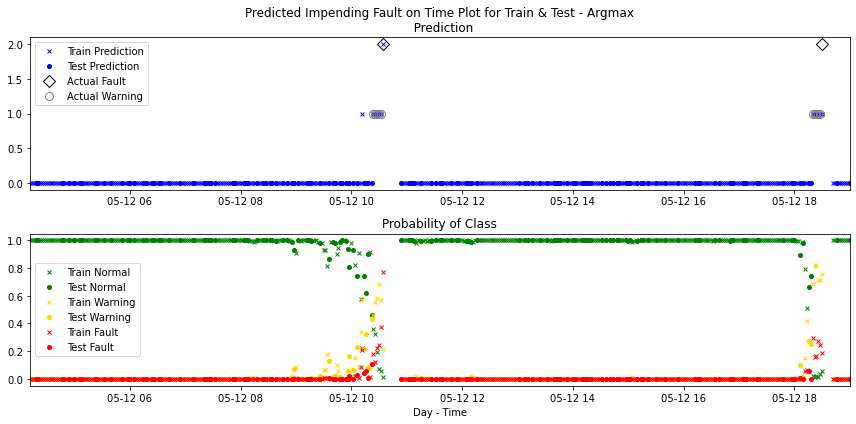

In [33]:
Train_Test_Time_Plot(2, y_train, y_pred_train, y_prob_train, train_indx, y_test, y_pred, y_prob, test_indx, img_index, 4, 1120, 1550, 'Time Plot for Train & Test - Argmax', fig_height=6, show_normal=True)

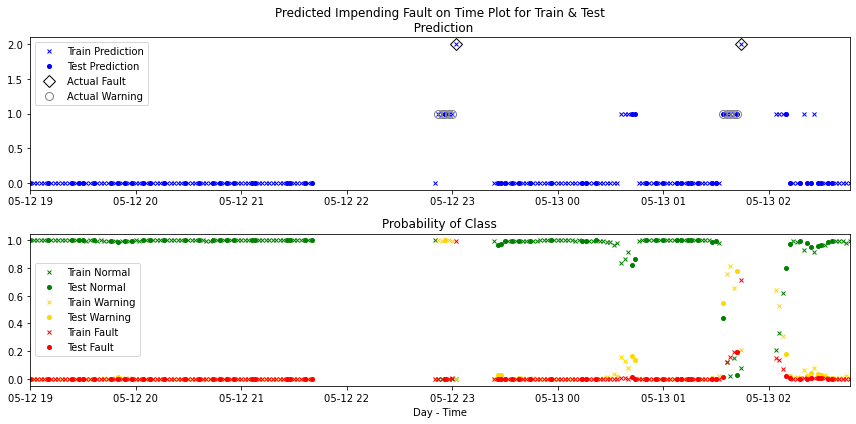

In [23]:
Train_Test_Time_Plot(2, y_train, a_pred_train, y_prob_train, train_indx, y_test, a_pred, y_prob, test_indx, img_index, 4, 1550, 1730, 'Time Plot for Train & Test', fig_height=6, show_normal=True)

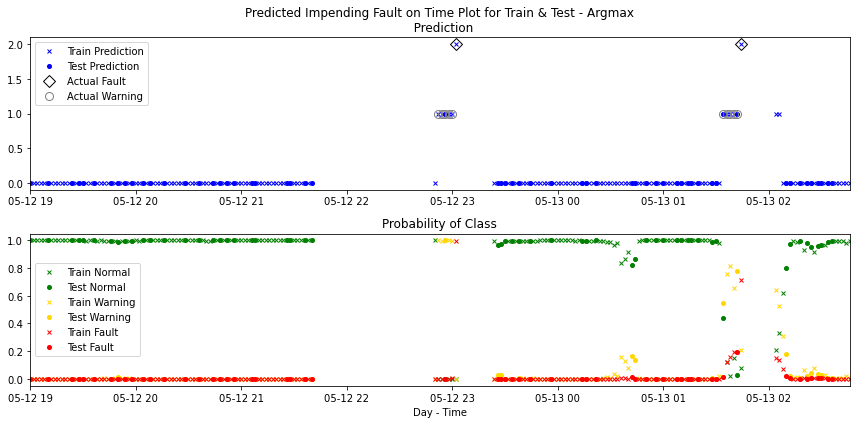

In [34]:
Train_Test_Time_Plot(2, y_train, y_pred_train, y_prob_train, train_indx, y_test, y_pred, y_prob, test_indx, img_index, 4, 1550, 1730, 'Time Plot for Train & Test - Argmax', fig_height=6, show_normal=True)

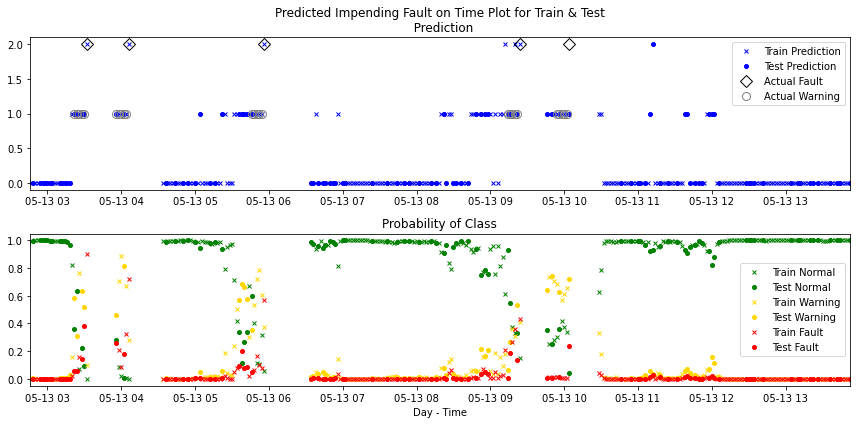

In [25]:
Train_Test_Time_Plot(2, y_train, a_pred_train, y_prob_train, train_indx, y_test, a_pred, y_prob, test_indx, img_index, 4, 1730, 2000, 'Time Plot for Train & Test', fig_height=6, show_normal=True)

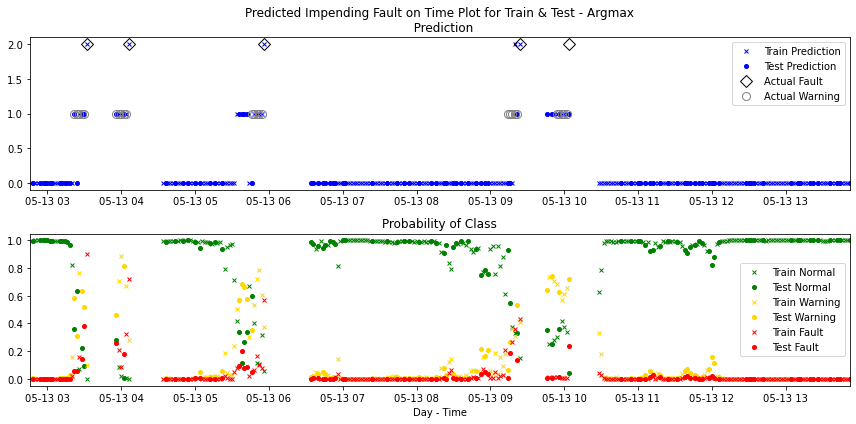

In [35]:
Train_Test_Time_Plot(2, y_train, y_pred_train, y_prob_train, train_indx, y_test, y_pred, y_prob, test_indx, img_index, 4, 1730, 2000, 'Time Plot for Train & Test - Argmax', fig_height=6, show_normal=True)

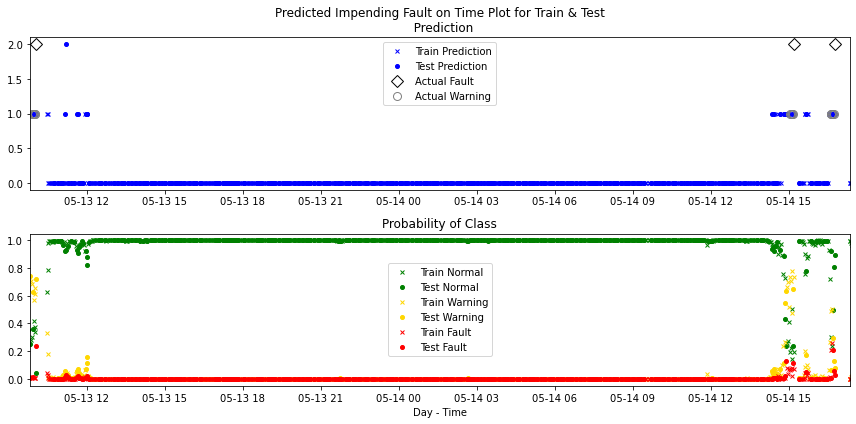

In [27]:
Train_Test_Time_Plot(2, y_train, a_pred_train, y_prob_train, train_indx, y_test, a_pred, y_prob, test_indx, img_index, 4, 1890, 2800, 'Time Plot for Train & Test', fig_height=6, show_normal=True)

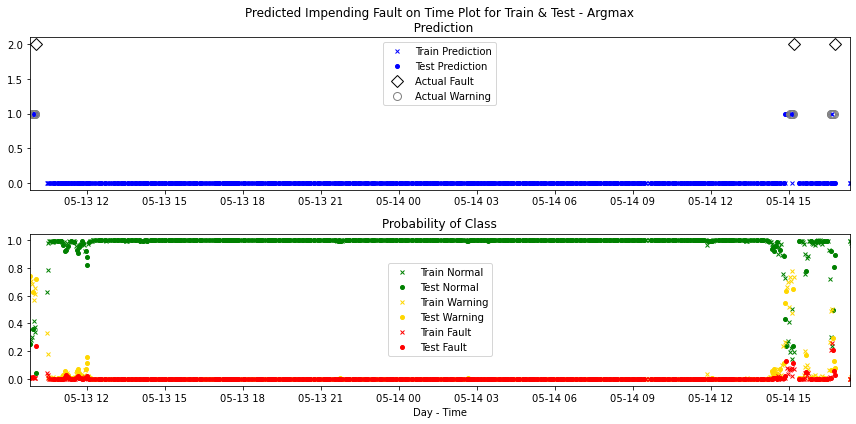

In [36]:
Train_Test_Time_Plot(2, y_train, y_pred_train, y_prob_train, train_indx, y_test, y_pred, y_prob, test_indx, img_index, 4, 1890, 2800, 'Time Plot for Train & Test - Argmax', fig_height=6, show_normal=True)

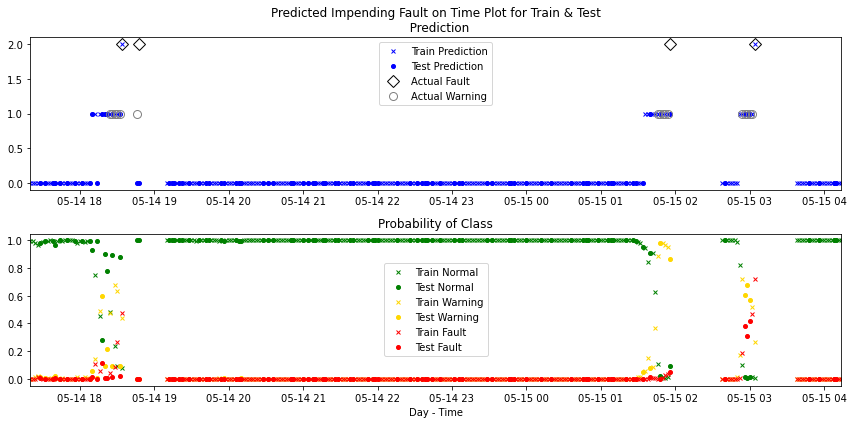

In [29]:
Train_Test_Time_Plot(2, y_train, a_pred_train, y_prob_train, train_indx, y_test, a_pred, y_prob, test_indx, img_index, 4, 2800, 3076, 'Time Plot for Train & Test', fig_height=6, show_normal=True)

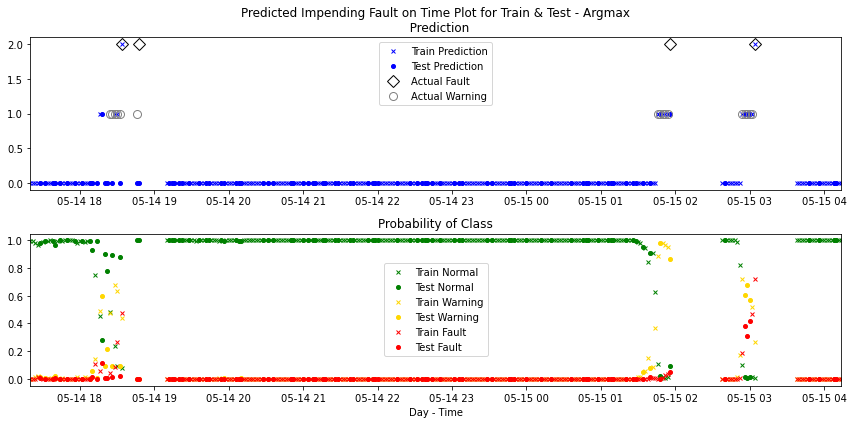

In [37]:
Train_Test_Time_Plot(2, y_train, y_pred_train, y_prob_train, train_indx, y_test, y_pred, y_prob, test_indx, img_index, 4, 2800, 3076, 'Time Plot for Train & Test - Argmax', fig_height=6, show_normal=True)

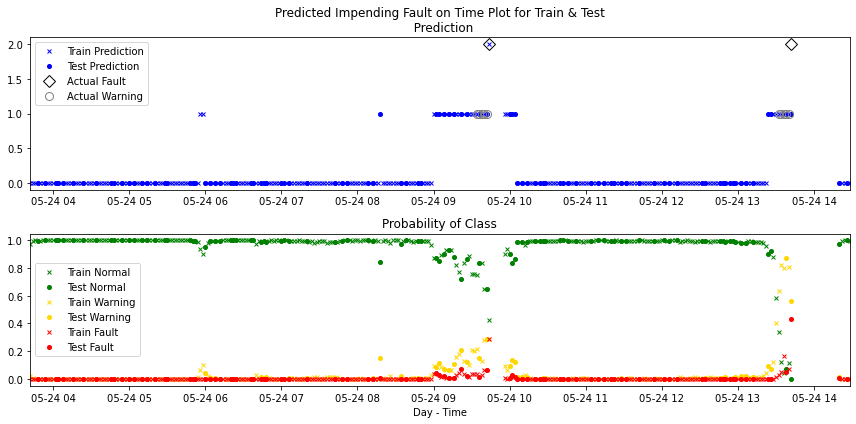

In [31]:
Train_Test_Time_Plot(2, y_train, a_pred_train, y_prob_train, train_indx, y_test, a_pred, y_prob, test_indx, img_index, 4, 3100, 3400, 'Time Plot for Train & Test', fig_height=6, show_normal=True)

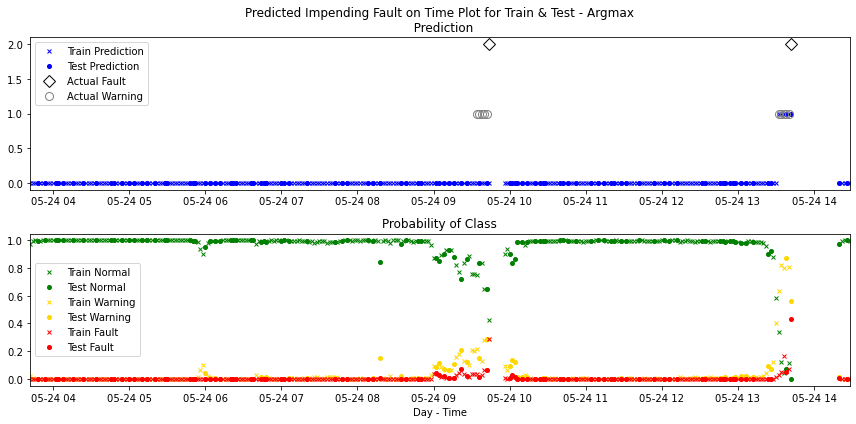

In [38]:
Train_Test_Time_Plot(2, y_train, y_pred_train, y_prob_train, train_indx, y_test, y_pred, y_prob, test_indx, img_index, 4, 3100, 3400, 'Time Plot for Train & Test - Argmax', fig_height=6, show_normal=True)

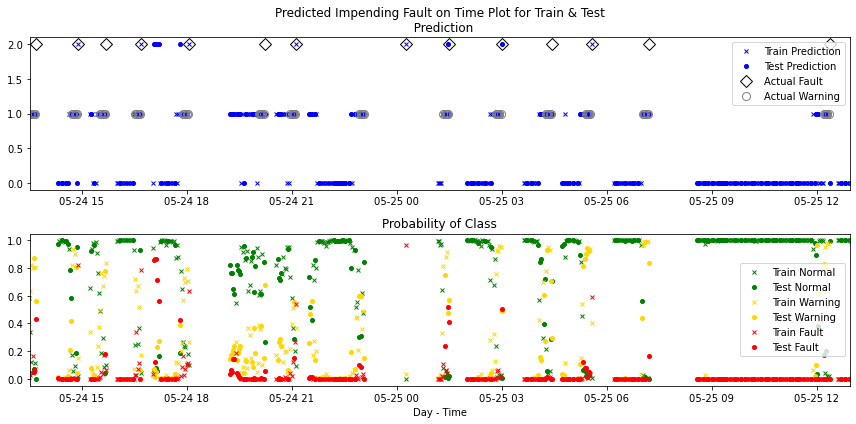

In [39]:
Train_Test_Time_Plot(2, y_train, a_pred_train, y_prob_train, train_indx, y_test, a_pred, y_prob, test_indx, img_index, 4, 3390, 3830, 'Time Plot for Train & Test', fig_height=6, show_normal=True)

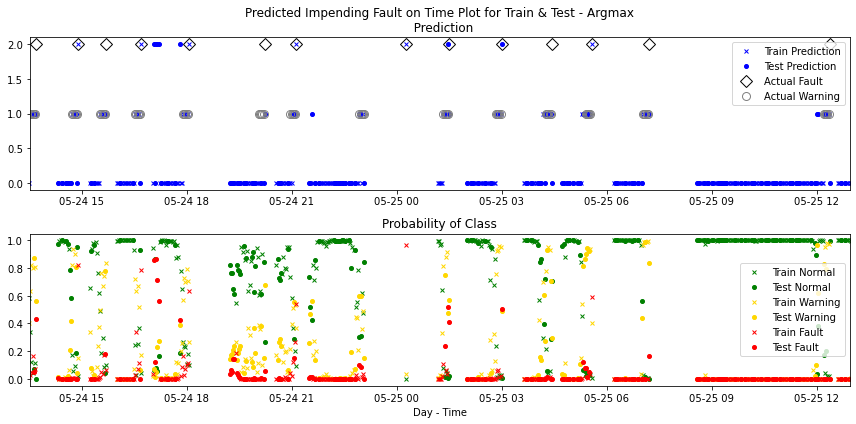

In [40]:
Train_Test_Time_Plot(2, y_train, y_pred_train, y_prob_train, train_indx, y_test, y_pred, y_prob, test_indx, img_index, 4, 3390, 3830, 'Time Plot for Train & Test - Argmax', fig_height=6, show_normal=True)

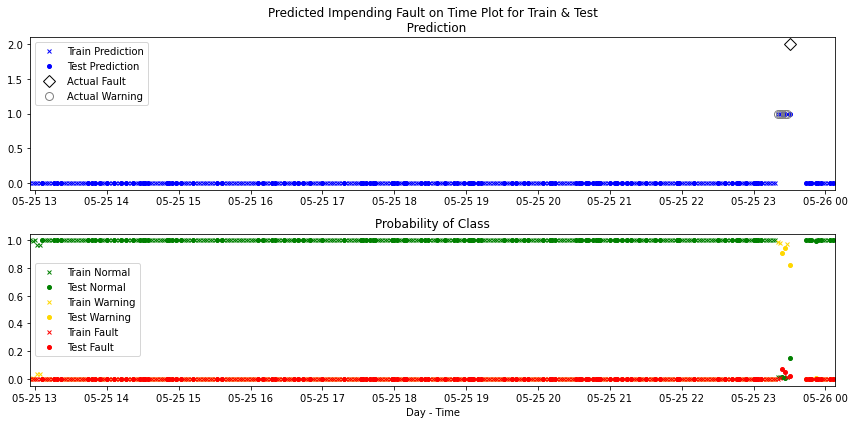

In [41]:
Train_Test_Time_Plot(2, y_train, a_pred_train,y_prob_train, train_indx, y_test, a_pred, y_prob, test_indx, img_index, 4, 3830, 4160, 'Time Plot for Train & Test', fig_height=6, show_normal=True)

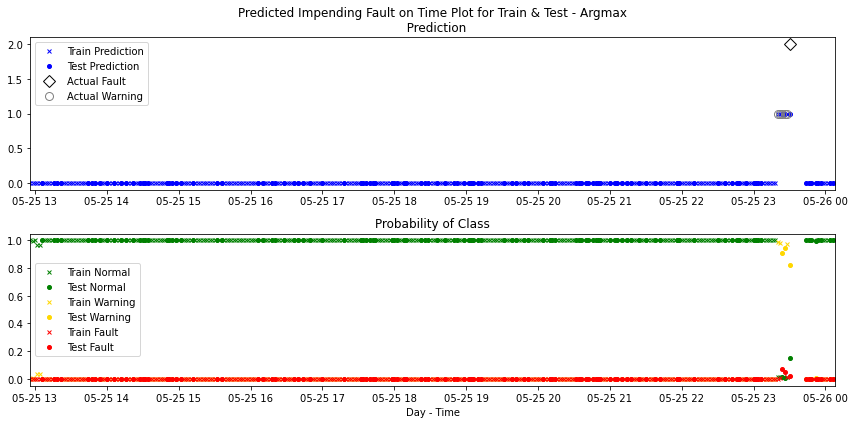

In [42]:
Train_Test_Time_Plot(2, y_train, y_pred_train,y_prob_train, train_indx, y_test, y_pred, y_prob, test_indx, img_index, 4, 3830, 4160, 'Time Plot for Train & Test - Argmax', fig_height=6, show_normal=True)

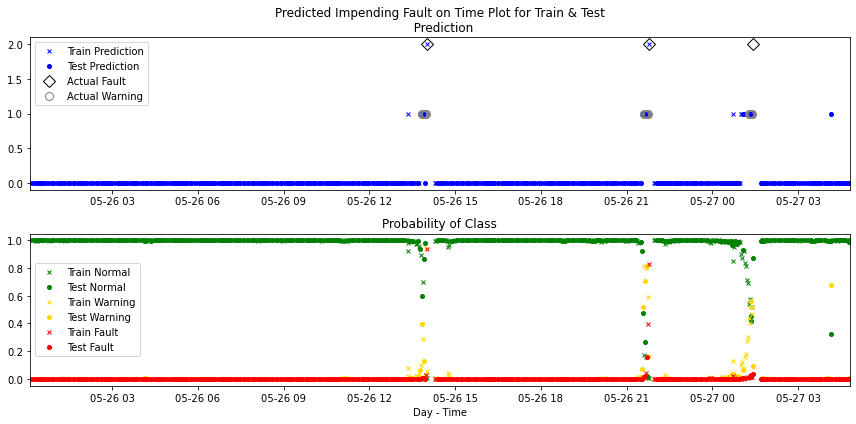

In [43]:
Train_Test_Time_Plot(2, y_train, a_pred_train,y_prob_train, train_indx, y_test, a_pred, y_prob, test_indx, img_index, 4, 4160, 5000, 'Time Plot for Train & Test', fig_height=6, show_normal=True)

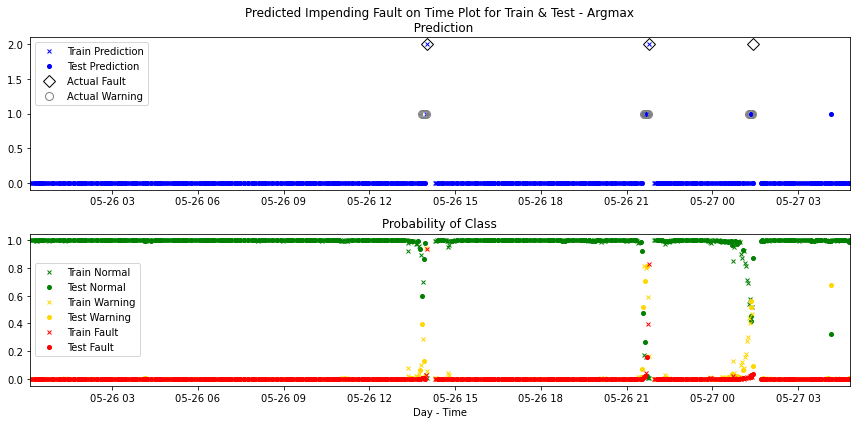

In [44]:
Train_Test_Time_Plot(2, y_train, y_pred_train,y_prob_train, train_indx, y_test, y_pred, y_prob, test_indx, img_index, 4, 4160, 5000, 'Time Plot for Train & Test - Argmax', fig_height=6, show_normal=True)

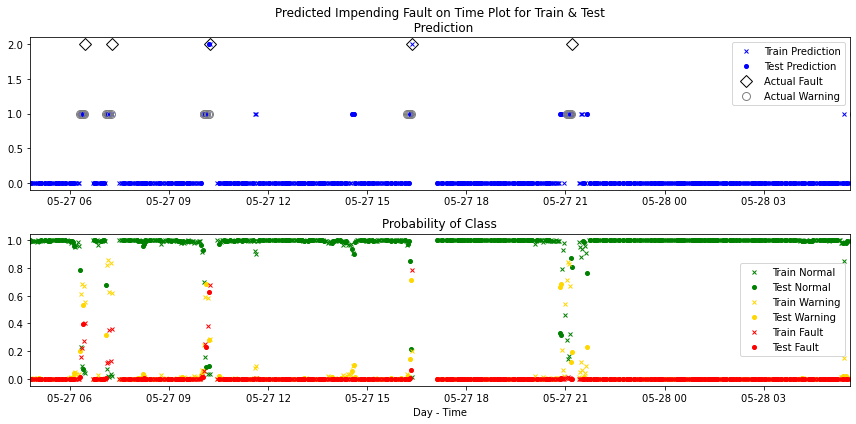

In [45]:
Train_Test_Time_Plot(2, y_train, a_pred_train,y_prob_train, train_indx, y_test, a_pred, y_prob, test_indx, img_index, 4, 5000, 5700, 'Time Plot for Train & Test', fig_height=6, show_normal=True)

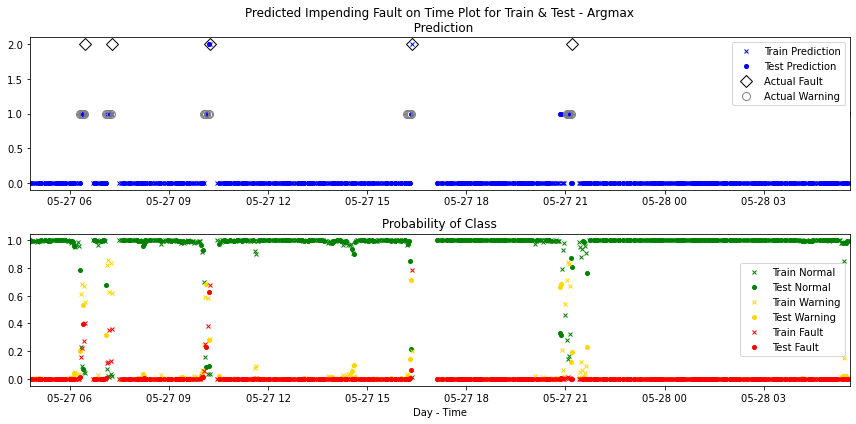

In [46]:
Train_Test_Time_Plot(2, y_train, y_pred_train,y_prob_train, train_indx, y_test, y_pred, y_prob, test_indx, img_index, 4, 5000, 5700, 'Time Plot for Train & Test - Argmax', fig_height=6, show_normal=True)

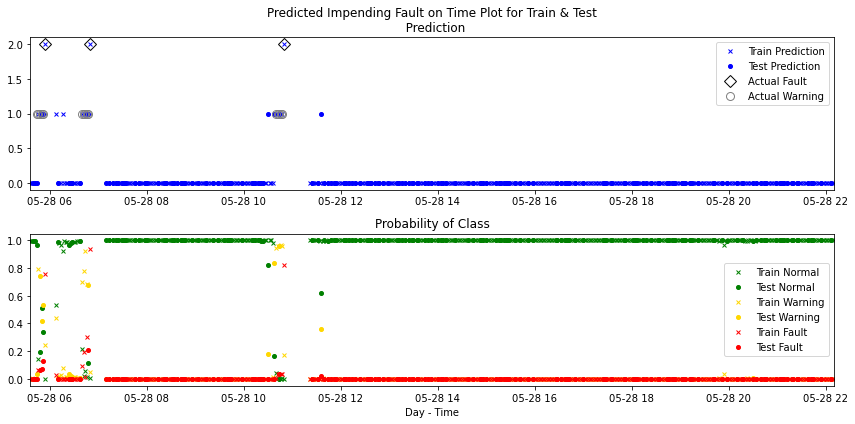

In [47]:
Train_Test_Time_Plot(2, y_train, a_pred_train,y_prob_train, train_indx, y_test, a_pred, y_prob, test_indx, img_index, 4, 5700, 6167, 'Time Plot for Train & Test', fig_height=6, show_normal=True)

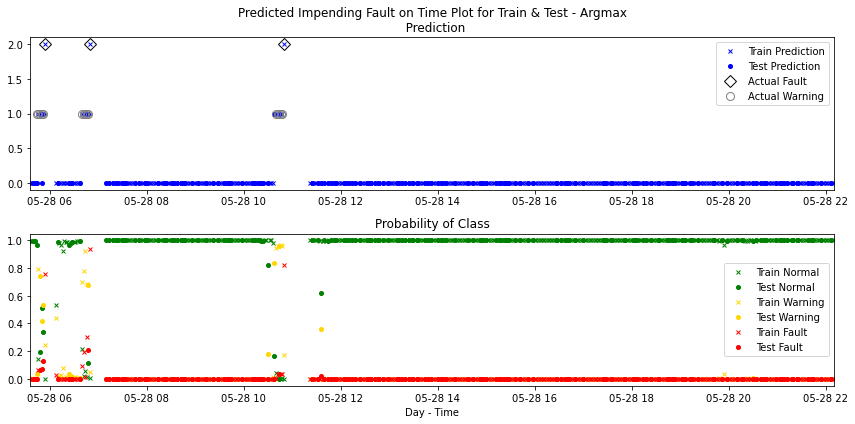

In [48]:
Train_Test_Time_Plot(2, y_train, y_pred_train,y_prob_train, train_indx, y_test, y_pred, y_prob, test_indx, img_index, 4, 5700, 6167, 'Time Plot for Train & Test - Argmax', fig_height=6, show_normal=True)

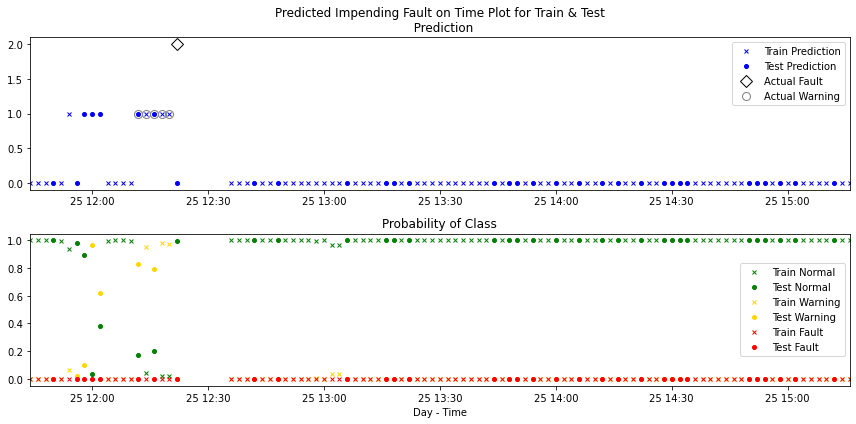

In [49]:
Train_Test_Time_Plot(2, y_train, a_pred_train, y_prob_train, train_indx, y_test, a_pred, y_prob, test_indx, img_index, 4,3800, 3900, 'Time Plot for Train & Test', fig_height=6, show_normal=True)

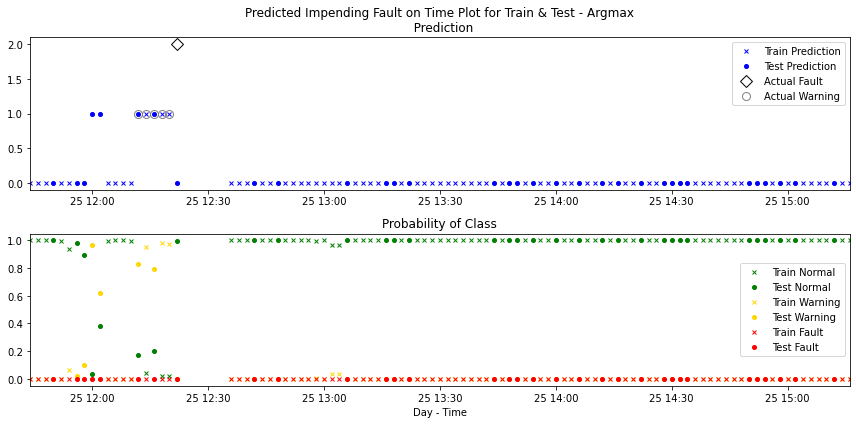

In [50]:
Train_Test_Time_Plot(2, y_train, y_pred_train, y_prob_train, train_indx, y_test, y_pred, y_prob, test_indx, img_index, 4,3800, 3900, 'Time Plot for Train & Test - Argmax', fig_height=6, show_normal=True)

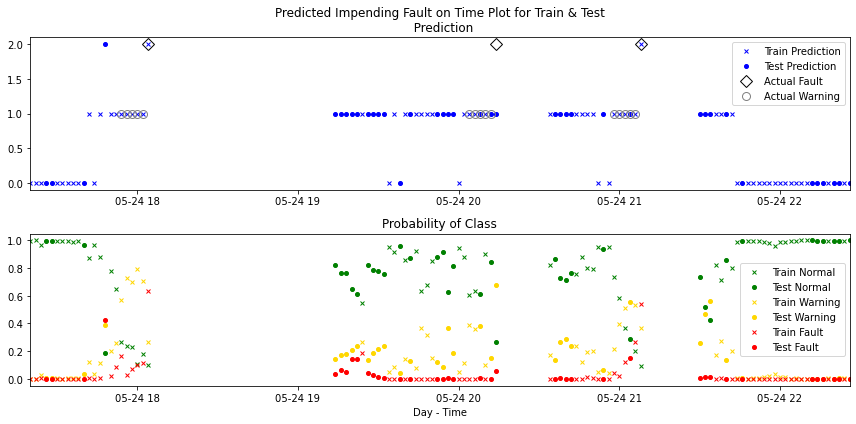

In [96]:
Train_Test_Time_Plot(2, y_train, a_pred_train, y_prob_train, train_indx, y_test, a_pred, y_prob, test_indx, img_index, 4, 3460, 3560, 'Time Plot for Train & Test', fig_height=6, show_normal=True)

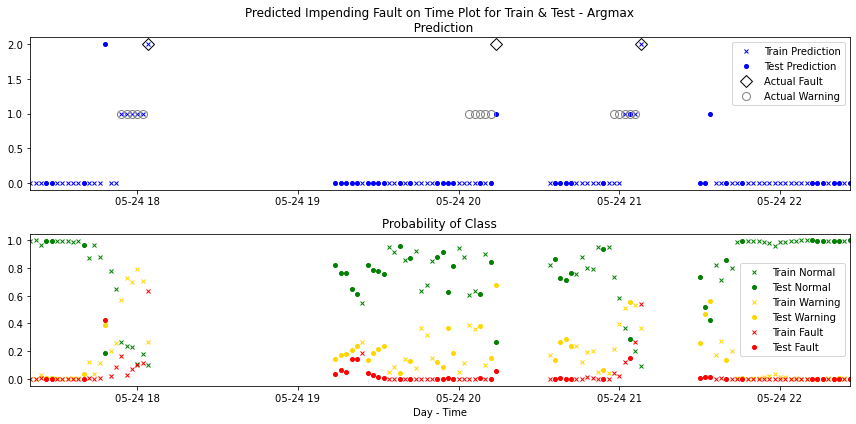

In [97]:
Train_Test_Time_Plot(2, y_train, y_pred_train, y_prob_train, train_indx, y_test, y_pred, y_prob, test_indx, img_index, 4, 3460, 3560, 'Time Plot for Train & Test - Argmax', fig_height=6, show_normal=True)